In [10]:
# ライブラリのimport
import numpy as np
import pandas as pd
# 表示桁数の指定
%precision 3
from matplotlib import pyplot as plt
import seaborn as sns
# グラフをjupyter notebook内に表示
%matplotlib inline

In [11]:
# データ
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

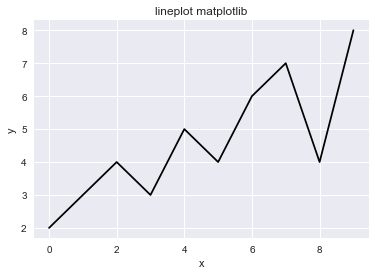

In [12]:
plt.plot(x, y, color='black')
plt.title("lineplot matplotlib") # タイトル
plt.xlabel("x") # x軸
plt.ylabel("y") # y軸
plt.savefig("01")

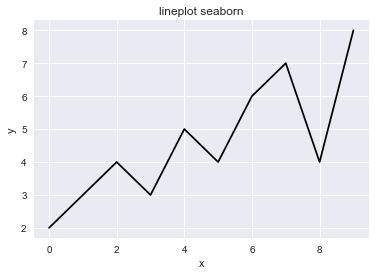

In [13]:
plt.plot(x, y, color='black')
plt.title("lineplot seaborn") # タイトル
plt.xlabel("x") # x軸
plt.ylabel("y") # y軸
plt.savefig("02")

### <font color='blue'>seabornによるヒストグラム</font>

In [14]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

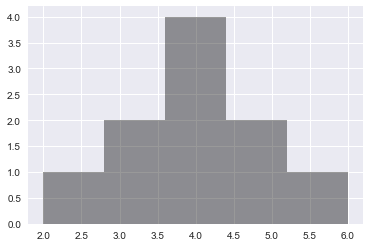

In [15]:
sns.distplot(fish_data, bins = 5, color = 'black', kde = False)

### <font color = 'blue'>カーネル密度推定</font>

ヒストグラムの問題点は、区分をどのように設定するかによって変わってくる。<br>
以下に例をあげる。<br>

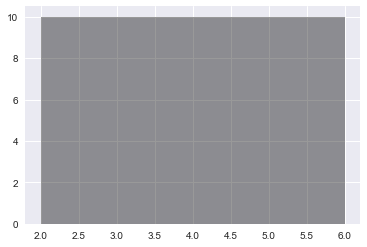

In [16]:
sns.distplot(fish_data, bins = 1, color = 'black', kde = False)

そこで区分を分けるのではなく、ヒストグラムを滑らかな線でつなぐという発想が生まれる。<br>

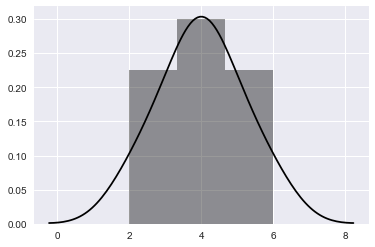

In [17]:
sns.distplot(fish_data, color='black')

### <font color='blue'>2変数データに対するヒストグラム</font>

In [18]:
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")

In [19]:
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


まずは種類ごとの統計量を計算。<br>

In [20]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

種類ごとに体長データを取り出す。<br>

In [24]:
# 種類ごとに体長データを取り出す
length_a = fish_multi.query('species=="A"')["length"]
length_b = fish_multi.query('species=="B"')["length"]

ヒストグラムを描く関数を２回連続で実行する。<br>

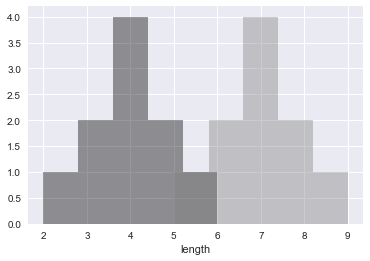

In [25]:
sns.distplot(length_a, bins = 5, color = 'black', kde = False)
sns.distplot(length_b, bins = 5, color = 'gray', kde = False)

Seabornを使うときは以下のように書く。<br>
sns.関数名(
 x = "x軸の列名",
 y = "y軸の列名",
 data = データフレーム,
 その他引数
)

### <font color='blue'>箱ひげ図</font>

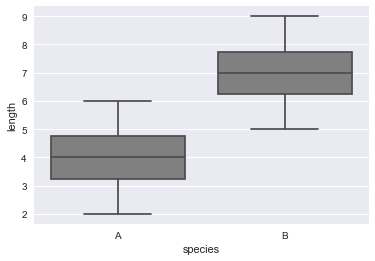

In [27]:
# 箱ひげ図
sns.boxplot(x = "species", y = "length", data = fish_multi, color='gray')

### <font color='blue'>バイオリンプロット</font>

箱の代わりにカーネル密度推定を用いた。<br>

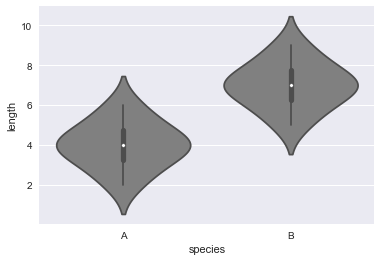

In [28]:
sns.violinplot(x = "species", y = "length", data = fish_multi, color = 'gray')

### <font color='blue'>棒グラフ</font>

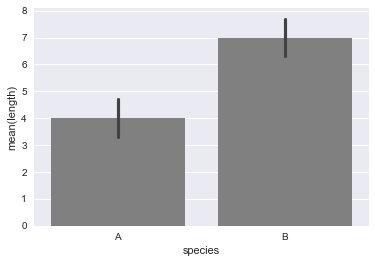

In [30]:
sns.barplot(x = "species", y = "length", data = fish_multi, color='gray')

### <font color='blue'>散布図</font>

In [31]:
cov_data = pd.read_csv("3-2-3-cov.csv")

In [32]:
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


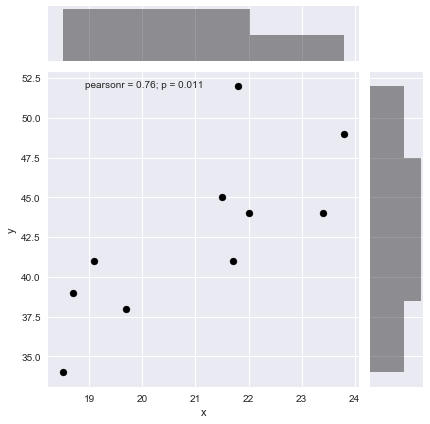

In [34]:
# 散布図を描く
sns.jointplot(x="x", y="y", data=cov_data, color="black")

上記から正の相関が得られていることがわかる。<br>

### <font color='blue'>ペアプロット</font>

最後に、多くの変数を持つデータに対する図示の仕方を説明する。<br>
2つ以上の変数をまとめて図示する場合は、プログラムの書き方が変わる。<br>

In [35]:
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


データの特徴についてみる<br>

In [36]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


図示する

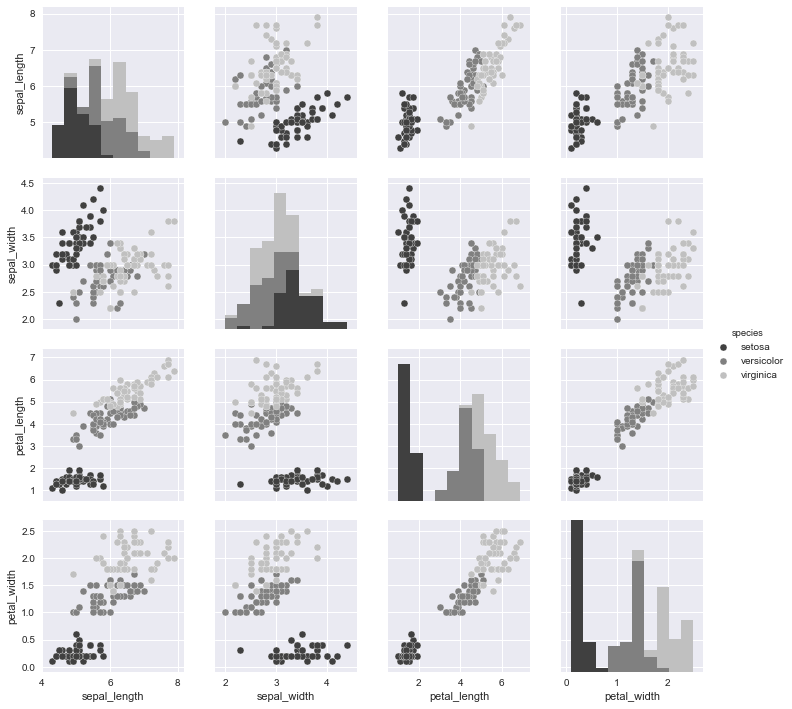

In [40]:
sns.pairplot(iris, hue='species', palette='gray')